---
# **LA LOI DU CROUS :**
## *Étude des déterminations du prix des résidences universitaires Crous et de leurs répartitions dans les départements*
---

# Introduction

350 000 étudiants habitent dans une résidence des centres régionaux des œuvres universitaires et scolaires (Crous), soit seulement 10% des 2 millions d'étudiants vivant hors de leur domicile, selon un  rapport sur le logement et la précarité des étudiants, des apprentis et des jeunes actifs de l'Assemblée nationale datant de janvier 2022 [1]. Selon ce même rapport, le logement est le premier poste de dépense des étudiants soit 60% de leurs revenus. Il est donc primordial de donner accès à un logement abordable aux étudiants qui sont dans des situations de plus en plus précaires selon les départements où ils se trouvent. 

Partant de ces constats, nous nous sommes posés plusieurs questions : le loyer est-il le même pour un logement situé dans un marché immobilier en tension comme Paris que pour un logement dans un marché moins sous tension comme Dijon ? Ou au contraire, est-ce que les prix sont globalement uniformes ? De même, est-ce que la concentration importante d'étudiants scolarisés à proximité de la résidence influe à la hausse le prix ? 

De ce fait, nous chercherons donc à répondre à la problématique suivante : 

***Les loyers des résidences des Crous suivent-ils la loi de l'offre et de la demande ?***

**Modèle :**

Ainsi, nous proposons d'étudier dans ce rapport, d'une part la répartition des 795 résidences des Crous sur le territoire; et d'autre part, les déterminants du prix du loyer de celles-ci pour pouvoir montrer d'éventuelles variations entre les départements. Pour expliquer le loyer nous utiliserons un modèle d'offre et de demande économique élémentaire. Dans celui-ci, la résidence offre des biens de surfaces variables q à un prix p en mètre carré, et fait face à une concurrence représentée par le montant des loyers dans le parc privé. La demande sera représentée par l'effectif des étudiants scolarisés dans une école se situant dans un rayon de 20km de la résidence. Nous faisons l'hypothèse que les résidences proposent à peu près les mêmes caractéristiques (services, qualité du bâtiment...) entre elles et que les étudiants sont des price-takers. 

Nous réaliserons ainsi des régressions linéaires classiques : 

\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon}_i
\end{equation}

**PLAN:**

1. Dans une première partie, nous récupérons une base de données avec les loyers (maximum, minimum et moyen), les surfaces (idem), les coordonnées géographiques, les loyers privés dans la ville de la résidence et l'effectif des étudiants dans un périmètre de 20 kilomètres. 

2. Dans une deuxième partie, nous analyserons d'une part la répartition des résidences en France et, d'autre part, nous réaliserons des statistiques descriptives sur les différentes variables de notre base de données. 

3. Enfin, nous utiliserons des modèles de régressions linéaires pour répondre à notre problématique. 


[1] https://www.vie-publique.fr/rapport/283062-logement-et-precarite-des-etudiants-des-apprentis-et-des-jeunes-actifs

## Les données utilisées 

Nous nous servirons de plusieurs bases de données : 

1. **Ensemble des logements proposés aux étudiants par le réseau des CROUS :** 

Données mises à disposition par le Centre National des Œuvres Universitaires et Scolaires (CROUS). Elles ont été publiées en 2017 et sont mises à jour assez régulièrement. Le problème principal de cette base de données est la récupération des loyers et des surfaces qui sont stockés dans une colonne nommée "infos". De plus, chaque colonne a été remplie par les résidences. La qualité et la structure des informations sont donc très variables. Nous avons mis en place des techniques de traitement textuel ou de natural language processing (NPL).

https://www.data.gouv.fr/fr/datasets/ensemble-des-logements-proposes-aux-etudiants-par-le-reseau-des-crous/

2. **"Carte des loyers" - Indicateurs de loyers d'annonce par commune en 2018**

Données issues d'une collaboration entre la Direction Générale de l’Aménagement, du Logement et de la Nature (DGALN), une équipe de recherche en économie d’Agrosup Dijon, de l’Institut national de la recherche en agronomique (INRAE), de SeLoger, de leboncoin et de PAP. Ces équipes ont créé différents indicateurs par communes à partir de 9 millions d'annonces. Les données datent de 2018 et nous nous servirons uniquement de données pour les appartements.

https://www.data.gouv.fr/fr/datasets/carte-des-loyers-indicateurs-de-loyers-dannonce-par-commune-en-2018/


3. **Statistiques sur les effectifs d'étudiants inscrits par établissement public sous tutelle du ministère en charge de l'Enseignement supérieur (avec double inscription CPGE)**

"Ce jeu de données propose un ensemble de statistiques sur les effectifs d'étudiants inscrits de 2006-07 à 2021-22 par établissement public sous tutelle du ministère en charge de l'Enseignement supérieur français : universités, universités de technologie, grands établissements, COMUE, écoles normales supérieures, écoles centrales, INSA, autres écoles d'ingénieurs..." Certains étudiants comme des élèves de classes préparatoires ou des étudiants en double-diplôme sont inscrits dans plusieurs écoles.

https://www.data.gouv.fr/fr/datasets/statistiques-sur-les-effectifs-detudiants-inscrits-par-etablissement-public-sous-tutelle-du-ministere-en-charge-de-lenseignement-superieur-avec-doubles-inscriptions-cpge/

4. **Contours Communes France Administrative "Format Admin-Express" avec arrondissements**

Jeu de données de l'IGN regroupant les contours communales avec arrondissements.

https://www.data.gouv.fr/fr/datasets/contours-communes-france-administrative-format-admin-express-avec-arrondissements/

5. **Contours des départements français issus d'OpenStreetMap**

Jeu de données d'OpenStreetMap regroupant les contours géographiques des départements. 

https://www.data.gouv.fr/fr/datasets/contours-des-departements-francais-issus-d-openstreetmap/





# Librairies nécessaires

In [1]:
%%capture 
#hide output 
!pip install geoplot
!pip install contextily
!pip install altair

In [2]:
import pandas as pd 
import geopandas as gpd 
import nltk
nltk.download('punkt')
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns
import altair as alt 
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


# Partie I : Obtention du dataframe 

L'objectif de cette partie est de créer une base de données contenant pour chaque résidence : 
- Le prix du loyer (maximum, minimum et moyen);
- La surface (idem);
- Les coordonnées géographiques compatibles avec Géopanda (nécessaires pour récupérer le nombre d'étudiants et les cartes);
- L'indicateur du loyer privé maximum d'un appartement dans la ville de la résidence;
- Le nombre d'étudiants scolarisés dans un rayon de 20 km autour de la résidence hors CPGE

Le principal problème de cette base de données est le fait que d'une part, il n'existe pas de colonne contenant exlicitement le loyer et les surfaces, et d'autre part, chaque résidence a rempli à sa manière les informations sur les loyers et les surfaces, parfois ces données ne sont pas renseignées. Nous avons donc mis en place des fonctions de Natural Language Processing (NLP) pour pouvoir les réccupèrer (pour plus d'informations voir le document : functions_for_data_cleaning.py). Cela implique notamment qu'on ne puisse pas associer au prix prélevé la surface correspondante et que l'on ne puisse pas obtenir le nombre de logements de tel ou tel type par résidence (ex : on obtient un loyer de 500€ mais on ne sait pas à quelle surface ce loyer correspond, ni le nombre de logements loués à ce loyer au sein d'une résidence). 

## I.1. Récupération des loyers, des surfaces et de la localisation des résidences

Importation des données:

In [3]:
df = pd.read_csv("https://data.enseignementsup-recherche.gouv.fr//explore/dataset/fr_crous_logement_france_entiere/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false", 
                 sep =';')

Réduction de notre base de données aux 5 colonnes qui nous intéressent : 
- le nom de la résidence ou "title"; 
- la colonne comportant toutes les infos sur les surfaces et les loyers ; 
- l'adresse; 
- les coordonnées géographiques; 
- et les noms des régions.

In [4]:
df = df[["title", "infos", "address" ,"geocalisation", "regions"]]

In [5]:
from functions_for_data_cleaning import * #document .py comportant nos fonctions nécessaires au nettoyage

df = get_loyer(df) #récuppération des loyers à partir de la colonne "infos"
df = get_surface(df) #récuppération des surfaces à partir de la colonne "infos"
df = get_localisation(df) #récuppération des coordonnées géographiques à partir de la colonne "geocalisation"

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## I.2. Récupération des loyers privés des communes (avec la géolocalisation des communes)

Le but de cette partie est de joindre la base précédemment obtenue avec la base des indicateurs des loyers privés maximum pour un appartement et par commune (la variable contenant ce loyer privé est 'upr.lPm2').

In [6]:
df_private = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/8fac6fb7-cd07-4747-8e0b-b101c476f0da", encoding= 'unicode_escape', sep = ";")

On ne garde que le code INSEE, le nom de la ville et le loyer supérieur par m².


In [7]:
df_private = df_private[["INSEE", "LIBGEO","upr.IPm2"]]

On renomme la colonne INSEE en codgeo pour pouvoir la merger avec la carte des contours des villes.

In [8]:
df_private.rename(columns = {'INSEE':'codgeo',"upr.IPm2" : "Loyer_prive_m2" }, inplace = True)

In [9]:
"""
On rajoute un 0 devant le code INSEE quand il ne fait que quatre chiffres (pour uniformiser avec l'autre base).
"""
df_private["codgeo"] = df_private["codgeo"].apply(lambda x : "0" + x if len(x) == 4 else x)

"""
On transforme en float le loyer privé 
"""
df_private["Loyer_prive_m2"] = df_private["Loyer_prive_m2"].apply(lambda x : x.replace(',','.')) 
df_private["Loyer_prive_m2"] = df_private["Loyer_prive_m2"].astype(float)

In [10]:
df_private = df_private.set_index('codgeo') #on réindex le dataframe avec le code INSEE pour merger après. 

On récupére les contours géographiques des communes pour pouvoir faire la jointure avec notre base(cette étape prend un certain temps).

In [11]:
gdf_communes_boundaries = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/e9391593-fa95-4153-aabe-87ca84d197e9")

On ne garde que le code INSEE et les données polygoniales. 

In [12]:
gdf_communes_boundaries.rename(columns = {'INSEE_COM':'codgeo'}, inplace = True)
gdf_communes_boundaries = gdf_communes_boundaries[["codgeo", "geometry"]]
gdf_communes_boundaries = gdf_communes_boundaries.set_index('codgeo')


On concatène les deux dataframes.

In [13]:
gdf_private = pd.concat([df_private,gdf_communes_boundaries], axis = 1, join = "inner")

## I.3. Jointures spatiales

Maintenant que nous avons une base contenant des loyers privés avec les coordonnées des communes, nous allons pouvoir réaliser une jointure spatiale avec la base des résidences.

In [14]:
gdf_private = gpd.GeoDataFrame(gdf_private)  #on transforme en geodataframe 
df = gpd.sjoin(df, gdf_private, how='left', op='within') #on réalise la jointure à gauche avec within 
#i.e si le point est dans le polynôme. 

/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_166/2043432756.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df = gpd.sjoin(df, gdf_private, how='left', op='within') #on réalise la jointure à gauche avec within


In [15]:
del df['index_right'] #on supprime l'index right pour la prochaine jointure

## I.4 Ajout des départements 

Pour pouvoir avoir des comparaisons par départements nous allons récupérer les départements et les joindre avec nos bases grâce à une jointure spatiale. 

In [16]:
gdf_dep = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/eb36371a-761d-44a8-93ec-3d728bec17ce")
gdf_dep.rename(columns = {'nom':'departement'}, inplace = True)
gdf_dep = gdf_dep[["departement", "geometry", "code_insee"]]

In [17]:
df = gpd.sjoin(df, gdf_dep, how='left', op='within')
del df['index_right'] #on supprime l'index right pour la prochaine jointure

/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_166/3363061827.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df = gpd.sjoin(df, gdf_dep, how='left', op='within')


In [18]:
gdf_dep

,departement,geometry,code_insee
0,La Réunion,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -...",974
1,Aude,"POLYGON ((1.68872 43.27368, 1.69001 43.27423, ...",11
2,Haute-Loire,"POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...",43
3,Bouches-du-Rhône,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",13
4,Lot-et-Garonne,"POLYGON ((-0.14058 44.22648, -0.12931 44.23218...",47
...,...,...,...
97,Morbihan,"MULTIPOLYGON (((-3.73508 48.11140, -3.73507 48...",56
98,Doubs,"POLYGON ((5.69876 47.26464, 5.69877 47.26481, ...",25
99,Jura,"MULTIPOLYGON (((5.25202 46.94451, 5.25208 46.9...",39
100,Ardèche,"POLYGON ((3.86110 44.71118, 3.86110 44.71151, ...",07


## I.5. Association de résidences à une école 
L'objectif de cette partie est d'associer à chaque résidence tous les étudiants qui se trouvent dans un rayon de 20km autour de leur localisation. Ainsi, nous aurons une idée de la demande potentielle associée à chaque résidence. Un même étudiant pourra donc être associé à plusieurs résidences. 

Import de notre base de données des écoles pour pouvoir récupérer le nombre d'étudiants scolarisés dans un rayon de 20km.

In [19]:
df_schools = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/0c713161-26fb-415e-ac1d-8769125f338d", sep = ";")

In [20]:
df_schools

,attention,annee_universitaire,etablissement_type,etablissement_typologie,etablissement_id_paysage,etablissement_lib,etablissement_id_wikidata,etablissement_id_ror,etablissement_id_uai,etablissement_localisation,...,etablissement_id_departement,etablissement_departement,etablissement_id_uucr,etablissement_uucr,etablissement_code_commune,etablissement_commune,etablissement_id_paysage_actuel,etablissement_actuel_lib,rentree,annee
0,Sans double compte des établissements-composan...,2006-07,Université,Université pluridisciplinaire avec santé,06SE7,Université de Bretagne Occidentale,Q1857334,01b8h3982,0290346U,Bretagne>Rennes>Finistère>Brest,...,D029,Finistère,UU29701,Brest,29019,Brest,06SE7,Université de Bretagne Occidentale,2006,2007
1,Sans double compte des établissements-composan...,2006-07,Université,Université tertiaire - droit et économie,542Id,Université Toulouse Capitole,Q590201,0443n9e75,0311382J,Occitanie>Toulouse>Haute-Garonne>Toulouse,...,D031,Haute-Garonne,UU00758,Toulouse,31555,Toulouse,542Id,Université Toulouse Capitole,2006,2007
2,Sans double compte des établissements-composan...,2006-07,Autre établissement,NaN,5y7lF,Institut universitaire de formation des maître...,NaN,NaN,9730224F,Guyane>Cayenne,...,D973,Guyane,UU9C601,Cayenne,97302,Cayenne,hy4EW,Université de Guyane,2006,2007
3,Sans double compte des établissements-composan...,2006-07,Université,Université pluridisciplinaire avec santé,7hB8r,Université de Nantes,Q259388,03gnr7b55,0440984F,Pays de la Loire>Nantes>Loire-Atlantique>Nantes,...,D044,Loire-Atlantique,UU44701,Nantes,44109,Nantes,qUCQp,Nantes Université,2006,2007
4,Sans double compte des établissements-composan...,2006-07,École,NaN,8618D,École normale supérieure PSL,Q83259,05a0dhs15,0753455Y,Île-de-France>Paris>Paris 5e,...,D075,Paris,UU00851,Paris,75105,Paris 5e,8618D,École normale supérieure PSL,2006,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,Sans double compte des établissements-composan...,2021-22,École,NaN,tdEpy,École nationale supérieure de l'électronique e...,Q2707341,03qeacd72,0951376E,Île-de-France>Versailles>Val-d'Oise>Paris>Cergy,...,D095,Val-d'Oise,UU00851,Paris,95127,Cergy,tdEpy,École nationale supérieure de l'électronique e...,2021,2022
2284,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,vb71K,Université Paris-Est Créteil,Q980688,05ggc9x40,0941111X,Île-de-France>Créteil>Val-de-Marne>Paris>Créteil,...,D094,Val-de-Marne,UU00851,Paris,94028,Créteil,vb71K,Université Paris-Est Créteil,2021,2022
2285,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,xJdyB,Aix-Marseille Université,Q2302586,035xkbk20,0134009M,Provence-Alpes-Côte d'Azur>Aix-Marseille>Bouch...,...,D013,Bouches-du-Rhône,UU00759,Marseille-Aix-en-Provence,13207,Marseille 7e,xJdyB,Aix-Marseille Université,2021,2022
2286,Sans double compte des établissements-composan...,2021-22,École,NaN,zHvr4,École nationale supérieure des arts et techniq...,Q3578242,NaN,0693735K,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Lyon 5e,...,D069,Rhône,UU00760,Lyon,69385,Lyon 5e,zHvr4,École nationale supérieure des arts et techniq...,2021,2022


In [21]:
df_schools = df_schools[df_schools["annee_universitaire"] == "2021-22" ] #on ne prend que l'année 2021-22
df_schools = df_schools[["etablissement_lib", "effectif_sans_cpge", "etablissement_code_commune", "etablissement_commune",  "etablissement_departement"]]
df_schools.rename(columns = {'etablissement_code_commune':'codgeo'}, inplace = True) #On renomme la colonne pour la jointure

On enlève les valeurs manquantes (il manque des coordonnées pour certains établissments).

In [22]:
index_with_nan = df_schools.index[df_schools.isnull().any(axis=1)]
df_schools.drop(index_with_nan,0, inplace=True) 
df_schools.set_index('codgeo', inplace = True) #on recommence l'index

/tmp/ipykernel_166/2476089590.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_schools.drop(index_with_nan,0, inplace=True)


Jointure avec les coordonnées géographiques des communes pour pouvoir trouver dans un rayon de 20km les écoles autour des résidences.

In [23]:
df_schools = df_schools.join(gdf_communes_boundaries)
df_schools = gpd.GeoDataFrame(df_schools)
df_schools.crs = "epsg:4326"

On applique la fonction get_nb_student disponible dans le fichier function_for_data_cleaning.py qui permet d'obtenir le nombre d'étudiants dans un rayon de 20km autour de nos résidences.

In [24]:
df.crs = "epsg:4326" #on définit la projection de notre dataframe
df = get_nb_student(df, df_schools, 20)

## I.6. Obtention de la base de données finale

Nous obtenons la base de données suivantes.

In [25]:
print(df.columns)
df 

Index(['title', 'infos', 'address', 'geocalisation', 'regions', 'Loyer',
       'Max Loyer', 'Min Loyer', 'Mean Loyer', 'Surface', 'Max Surface',
       'Min Surface', 'Mean Surface', 'Longitude', 'Latitude', 'geometry',
       'LIBGEO', 'Loyer_prive_m2', 'departement', 'code_insee', 'Schools',
       'Nbstudents'],
      dtype='object')


,title,infos,address,geocalisation,regions,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,...,Mean Surface,Longitude,Latitude,geometry,LIBGEO,Loyer_prive_m2,departement,code_insee,Schools,Nbstudents
0,Résidence LES MEUNIERS,Située sur le campus des Cézeaux et proche de ...,1 avenue Blaise PASCAL 63170 AUBIERE,"45.760647,3.106047",Auvergne-Rhône-Alpes,"[318.0, 320.0]",320.00,318.00,319.000000,"[80.0, 20.0]",...,50.000000,3.106047,45.760647,POINT (3.10605 45.76065),Aubière,13.146637,Puy-de-Dôme,63,[Université Clermont Auvergne],36266
1,Résidence CEZEAUX - Cité 2,Située sur le campus des Cézeaux à Aubière. \r...,15 rue Roche-Genès 63170 Aubière Cedex,"45.7556964,3.1109675",Auvergne-Rhône-Alpes,"[246.3, 250.0]",250.00,246.30,248.150000,[10.0],...,10.000000,3.110968,45.755696,POINT (3.11097 45.75570),Aubière,13.146637,Puy-de-Dôme,63,[Université Clermont Auvergne],36266
2,Résidence LE PORT,Située dans le coeur historique de Clermont-Fe...,44 rue du Port 63000 Clermont-Ferrand,"45.7803344727,3.0897090435",Auvergne-Rhône-Alpes,"[305.0, 346.0, 310.0, 350.0]",350.00,305.00,327.750000,"[23.0, 23.0]",...,23.000000,3.089709,45.780334,POINT (3.08971 45.78033),Clermont-Ferrand,14.040392,Puy-de-Dôme,63,[Université Clermont Auvergne],36266
3,Résidence CEZEAUX - Cité 1,Située sur le campus des Cézeaux à Aubière. \r...,35 rue Roche-Genès 63170 Aubière Cedex,"45.7592953,3.1183559999999",Auvergne-Rhône-Alpes,"[246.3, 250.0]",250.00,246.30,248.150000,[10.0],...,10.000000,3.118356,45.759295,POINT (3.11836 45.75930),Aubière,13.146637,Puy-de-Dôme,63,[Université Clermont Auvergne],36266
4,Résidence Clairefontaine 1,Contact \nTéléphone05 56 95 55 55 \r\n \r\nEm...,13 rue Francisco Ferrer 33700 Merignac,"44.825801,-0.614005",Nouvelle-Aquitaine,[],NaN,NaN,NaN,"[20.0, 34.0, 20.0]",...,24.666667,-0.614005,44.825801,POINT (-0.61401 44.82580),Mérignac,15.487233,Gironde,33,"[Sciences Po Bordeaux, Université Bordeaux Mon...",71675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Résidence La Miroiterie Avignonnaise,(Loyer TCC hors ALS au 01/07/22)\n\n111 appart...,3 route de Lyon - 84000 Avignon,"43.9502716064,4.8211278915",Provence-Alpes-Côte d'Azur,"[354.49, 381.31, 290.0]",381.31,290.00,341.933333,"[20.0, 22.0]",...,21.000000,4.821128,43.950272,POINT (4.82113 43.95027),Avignon,14.315362,Vaucluse,84,[Avignon Université],6787
791,Résidence Jean Zay,(Loyer TCC hors ALS au 01/07/22) \r\n 170 stud...,420 rue Baruch de Spinoza Campus Jean-Henri fa...,"43.9118292,4.8896861000001",Provence-Alpes-Côte d'Azur,[317.59],317.59,317.59,317.590000,[18.0],...,18.000000,4.889686,43.911829,POINT (4.88969 43.91183),Avignon,14.315362,Vaucluse,84,[Avignon Université],6787
792,Résidence Dos Félibre,Résidence universitaire située à proximité de ...,17 avenue de l'Europe 13090 Aix-en-Provence,"43.5233879,5.4379037",Provence-Alpes-Côte d'Azur,"[310.0, 360.0]",360.00,310.00,335.000000,"[16.0, 18.0]",...,17.000000,5.437904,43.523388,POINT (5.43790 43.52339),Aix-en-Provence,20.962383,Bouches-du-Rhône,13,[Sciences Po Aix],1682
793,Résidence Lucien Cornil,La résidence Cornil est située au sein de la c...,168 rue Saint-Pierre - 13005 Marseille,"43.2924957275,5.3983178139",Provence-Alpes-Côte d'Azur,"[306.11, 436.82]",436.82,306.11,371.465000,[],...,NaN,5.398318,43.292496,POINT (5.39832 43.29250),Marseille 5e Arrondissement,16.830186,Bouches-du-Rhône,13,"[Aix-Marseille Université, Centrale Marseille]",72876


# Part II : Visualisation 

## II.0. Construction d'indicateurs 
Le but de cette partie est de construire des indicateurs que nous utiliserons par la suite.

Construction des indicateurs du prix des loyers par m2 ('Loyer_crous_prix_par_m2_surf_min' en référence aux studios et 'Loyer_crous_prix_par_m2_surf_max' en référence aux (grands) studios/colocation)

In [26]:
df['Loyer_crous_prix_par_m2_surf_min'] = df['Min Loyer']/df['Min Surface'] 
df['Loyer_crous_prix_par_m2_surf_max'] = df['Max Loyer']/df['Max Surface'] 

Construction d'un indicateur du nombre de Crous par nombre d'étudiants par département qui sera ensuite affiché sur une carte. Cela va créer un ratio en pourcentage.  

In [27]:
Nb_residence_par_dep = df.reset_index().groupby('departement')['index'].nunique() #on reindex le dataframe
#de 0 à n-1 puis on compte le nombre d'index unique par département pour avoir le nombre de résidences par départements
Nb_residence_par_dep = pd.DataFrame(Nb_residence_par_dep) #on transforme en dataframe 
nb_eleve_dep = df_schools.groupby('etablissement_departement').sum()['effectif_sans_cpge'] #on somme par département le nb
#le nombre d'étudiants
nb_eleve_dep = pd.DataFrame(nb_eleve_dep) #on transforme en dataframe pour la jointure
nb_residence_par_eleves = Nb_residence_par_dep.join(nb_eleve_dep, how = 'inner') #on joint nos deux dataframe
nb_residence_par_eleves = nb_residence_par_eleves.assign(Nb_by_students=lambda x: (x["index"]/x["effectif_sans_cpge"])*100)
#On crée notre ratio du nb de résidences/élèves/dép 
nb_residence_par_eleves = nb_residence_par_eleves.join(gdf_dep.set_index("departement"))
#on rajoute les coordonnées géographiques des départements (pour les cartes) 
nb_residence_par_eleves.reset_index(inplace = True)
#on reset index 
del nb_residence_par_eleves["geometry"]
#on supprime la colonne geometry par simplicité par la suite 

/tmp/ipykernel_166/2278214847.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nb_eleve_dep = df_schools.groupby('etablissement_departement').sum()['effectif_sans_cpge'] #on somme par département le nb


Dataframe avec les départements avec le plus d'étudiants dans l'ordre décroissant 

In [28]:
nb_eleve_dep_top_10 = nb_eleve_dep.sort_values(by='effectif_sans_cpge', ascending=False) 
nb_eleve_dep_top_10

,effectif_sans_cpge
etablissement_departement,
Paris,236136
Rhône,110738
Nord,106498
Haute-Garonne,90158
Bouches-du-Rhône,74558
Gironde,71675
Hérault,69980
Meurthe-et-Moselle,64943
Isère,57964


Dataframe avec les départements avec le plus de résidences Crous dans l'ordre décroissant 

In [29]:
nb_res_dep_top_10 = Nb_residence_par_dep.sort_values(by='index', ascending=False) 
nb_res_dep_top_10

,index
departement,
Paris,82
Métropole de Lyon,36
Gironde,34
Nord,32
Haute-Garonne,32
...,...
Saône-et-Loire,1
Creuse,1
Deux-Sèvres,1


Construction d'un ratio pour enlever les départements avec un nombre de valeurs manquantes (surfaces ou loyers) trop important

In [30]:
df_ratio_min = df
df_ratio_min['prix_par_m2_surf_min_null'] = df.Loyer_crous_prix_par_m2_surf_min.isnull() # On compte le nombre de valeurs manquantes par ligne
df_ratio_min['prix_par_m2_surf_min_null'] = df_ratio_min['prix_par_m2_surf_min_null'].astype(int) # on transforme le booléen en valeur 0 ou 1 (1 voulant dire que la valeur est manquante)
df_ratio_min = df_ratio_min.groupby(['departement'], as_index=False)['prix_par_m2_surf_min_null'].sum() # On additionne par département le nombre de résidences avec des valeurs manquantes
df_ratio_min = pd.merge(df_ratio_min, Nb_residence_par_dep, how="inner", on=[Nb_residence_par_dep.index, "departement"])
df_ratio_min = df_ratio_min.rename(columns={'index': 'Nb_res_dep'})
df_ratio_min['ratio'] = df_ratio_min['prix_par_m2_surf_min_null']/df_ratio_min['Nb_res_dep']
df_ratio_min = df_ratio_min[df_ratio_min['ratio']<0.5]    # On enlève les départements dont plus de 50 % des résidences présentent des valeurs manquantes 


df_dep_ratio = pd.merge(df_ratio_min, df , how="left", on=["departement", "departement"])


## II.1. Où se situent les Crous ? 

### II.1.A. Carte interactive des informations pratiques sur les Crous

Nous avons construit une carte interactive représentant l'ensemble des résidences Crous présentes en France métroplitaine et dans les départements et régions d'outre-mer. 
Cette première vue d'ensemble montre une concentration des résidences Crous dans les grandes métropoles françaises comme Paris, Lille, Lyon ou encore Bordeaux et dans les régions avec une forte population étudiante. 

La carte est interactive et permet de voir en un clic les principales informations de chaque résidence Crous (le nom de la résidence, son adresse, la surface moyenne des logements proposés et le loyer moyen).

In [31]:
map = folium.Map(location=[48.7144587, 2.2453842], tiles="OpenStreetMap", zoom_start=11)

# Create a geometry list from the GeoDataFrame

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in df.geometry] 


# Iterate through list and add a marker for each residence, color-coded by its type.

i = 0

for coordinates in geo_df_list:

    # Place the markers with the popup labels and data

    map.add_child(

        folium.Marker(

            location=coordinates,

            popup=

                 "Nom: " + str(df.title[i]) + "<br>"

                + "Moyenne Loyer: " + str(df["Mean Loyer"][i]) + "<br>"

                + "Moyenne surface: " + str(df["Mean Surface"][i]) + "<br>"

                + "Adresse: " + str(df.address[i]) + "<br>"

                + "Coordonnées: " + str(geo_df_list[i])

            ,

        

            icon=folium.Icon(color="blue"),

        )

    )

    i = i + 1

map

## II.2. Existent-ils des disparités entre les résidences Crous par département ? 

### II.2.A. Statistiques générales des résidences Crous

In [32]:
df_stats = df[['Min Loyer', 'Max Loyer', 'Min Surface', 'Max Surface', 'Loyer_crous_prix_par_m2_surf_min', 'Loyer_crous_prix_par_m2_surf_max', 'Loyer_prive_m2']]
df_stats.describe()

,Min Loyer,Max Loyer,Min Surface,Max Surface,Loyer_crous_prix_par_m2_surf_min,Loyer_crous_prix_par_m2_surf_max,Loyer_prive_m2
count,489.000000,489.000000,510.000000,510.000000,382.000000,382.000000,795.000000
mean,316.120736,415.986585,17.414275,28.302804,20.086438,17.234800,18.140672
std,74.792539,112.249823,6.610159,15.183576,5.861121,6.235839,7.331694
min,146.000000,146.000000,9.000000,9.000000,3.522727,3.522727,9.044010
25%,258.360000,350.000000,15.000000,18.000000,16.530357,13.048234,13.864082
50%,317.440000,404.000000,18.000000,25.000000,19.571336,17.509259,15.537166
75%,362.000000,467.000000,19.000000,33.000000,23.224412,20.418863,19.288130
max,635.000000,823.000000,88.000000,99.000000,68.777778,53.826087,51.044589


Des statistiques descriptives ci-dessus, nous constatons que : 
+  La surface moyenne d'un studio en résidence Crous est de 17,5 m2 pour un loyer mensuel moyen de 316 euros.  
+  Pour une colocation ou un T1/grand studio, la surface moyenne est de 28 m2 pour un loyer mensuel moyen de 416 euros. 
+  L'écart-type des loyers entre les différentes résidences Crous est assez élevé ce qui implique des disparités significatives entre départements : pour un studio par exemple, l'écart-type du prix du loyer au m2 est proche de 6 euros pour une moyenne de 20 euros/m2. 

Ainsi ces disparités confirment une variation des prix entre les résidences, ce que nous cherchons à expliquer dans ce projet. 

### II.2.B. Disparités en termes de surface entre les résidences Crous entre département 

Le loyer d'un logement dépend notamment de la surface de celui-ci, c'est pourquoi nous avons voulu comparer les éventuelles disparités entre département des résidences Crous sur la question de la superficie des logements proposés.
Nous remarquons que la surface du plus petit studio proposé par chaque résidence est généralement comprise entre 14 et 20 m2. Néanmoins, les différences sont plus nettes quant à la suface du plus grand logement (en colocation) proposé par les résidences Crous en fonction du département : par exemple à Lyon, la surface du plus grand logement disponible est de quasiment 100 m2 alors que dans le département du Doubs la plus grande colocation possible est a priori de deux personnes pour une surface d'environ 38 m2. 

Text(0.5, 1.0, 'Répartition des surfaces des logements dans les résidences Crous par département')

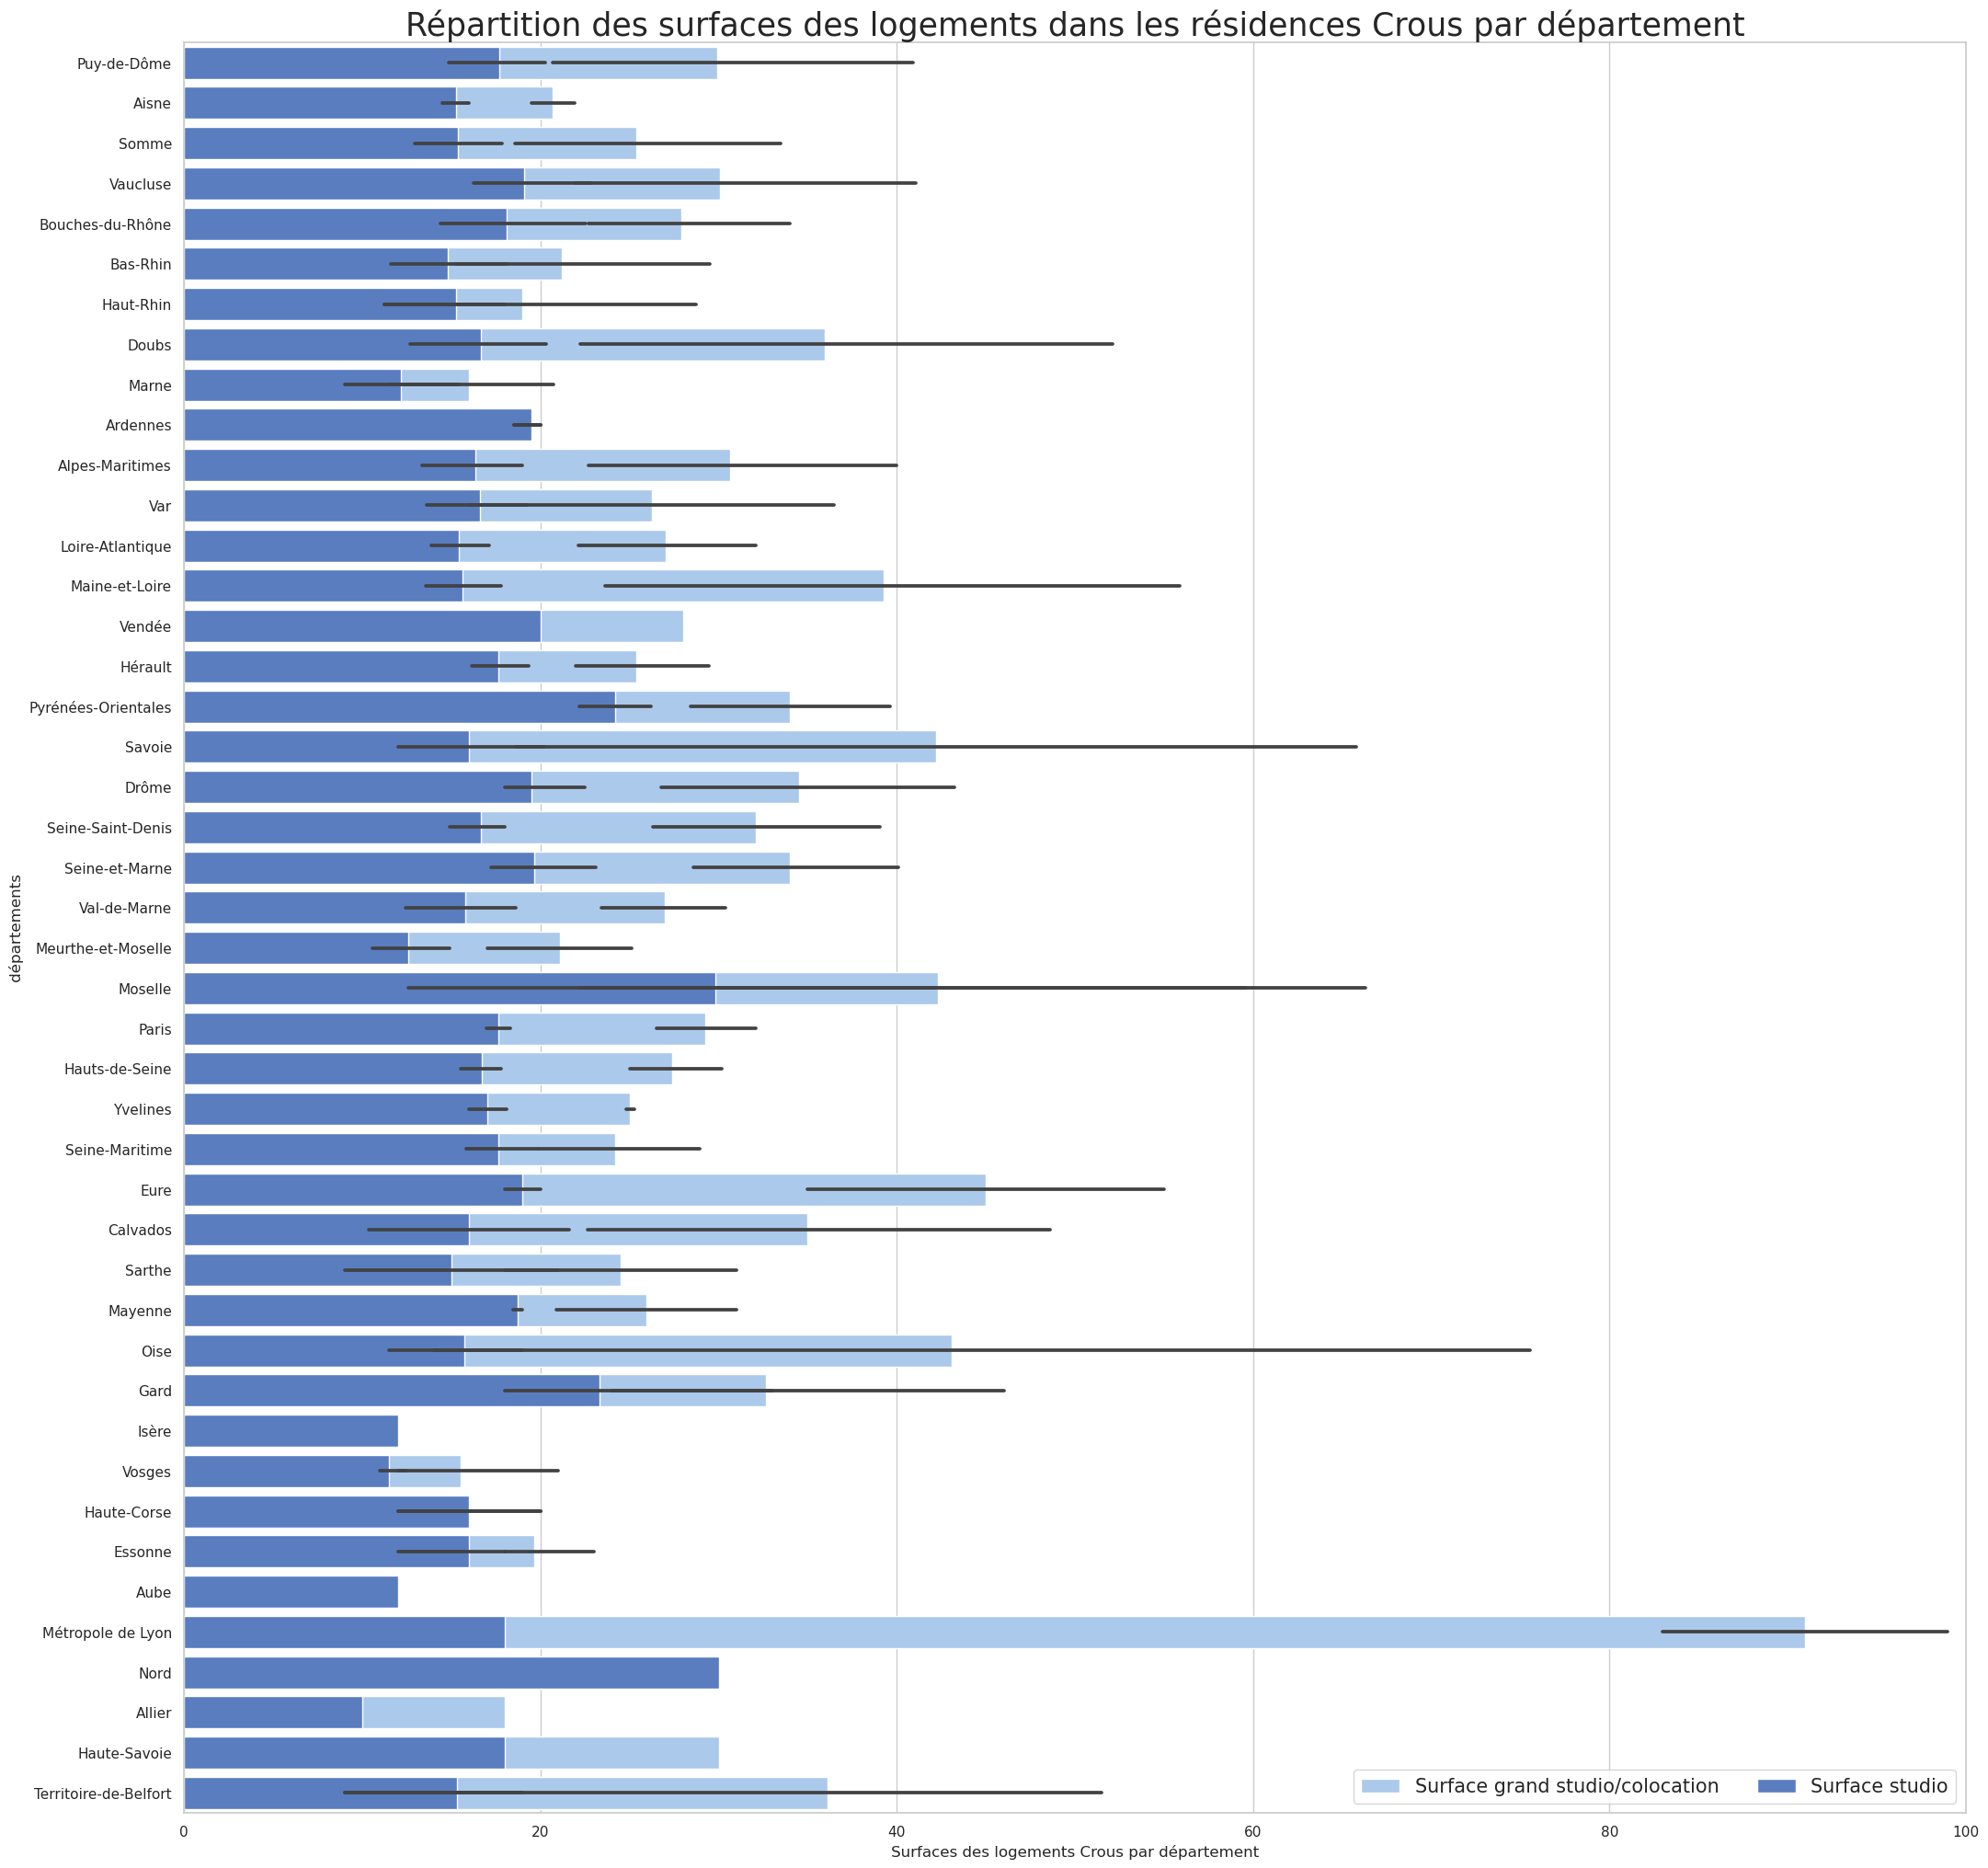

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid") 

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))


surfaces = df.dropna()


sns.set_color_codes("pastel")
sns.barplot(y="departement", x="Max Surface", data=surfaces,
            label="Surface grand studio/colocation", color="b")

sns.set_color_codes("muted") 
sns.barplot(y="departement", x="Min Surface", data=surfaces,
            label="Surface studio", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True, fontsize = 15)
ax.set(xlim=(0, 100), ylabel=" départements ",
       xlabel="Surfaces des logements Crous par département")
plt.title("Répartition des surfaces des logements dans les résidences Crous par département", size = 25) 


### II.2.C. Disparité du prix du loyer au m2 entre les résidences Crous par département et comparaison avec le privé

Nous effectuons une comparaison du prix des loyers au m2 des résidences Crous par département. Nous utilisons un indicateur de prix au m2 pour prendre en considération les différences en termes de surface des logements proposés par les résidences Crous entre département et nous le comparons en même temps avec le prix du loyer par m2 proposé dans le parc privé. 

/tmp/ipykernel_166/4062421552.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ordered_df = df.dropna().groupby("departement").mean().sort_values(by='Loyer_crous_prix_par_m2_surf_max')


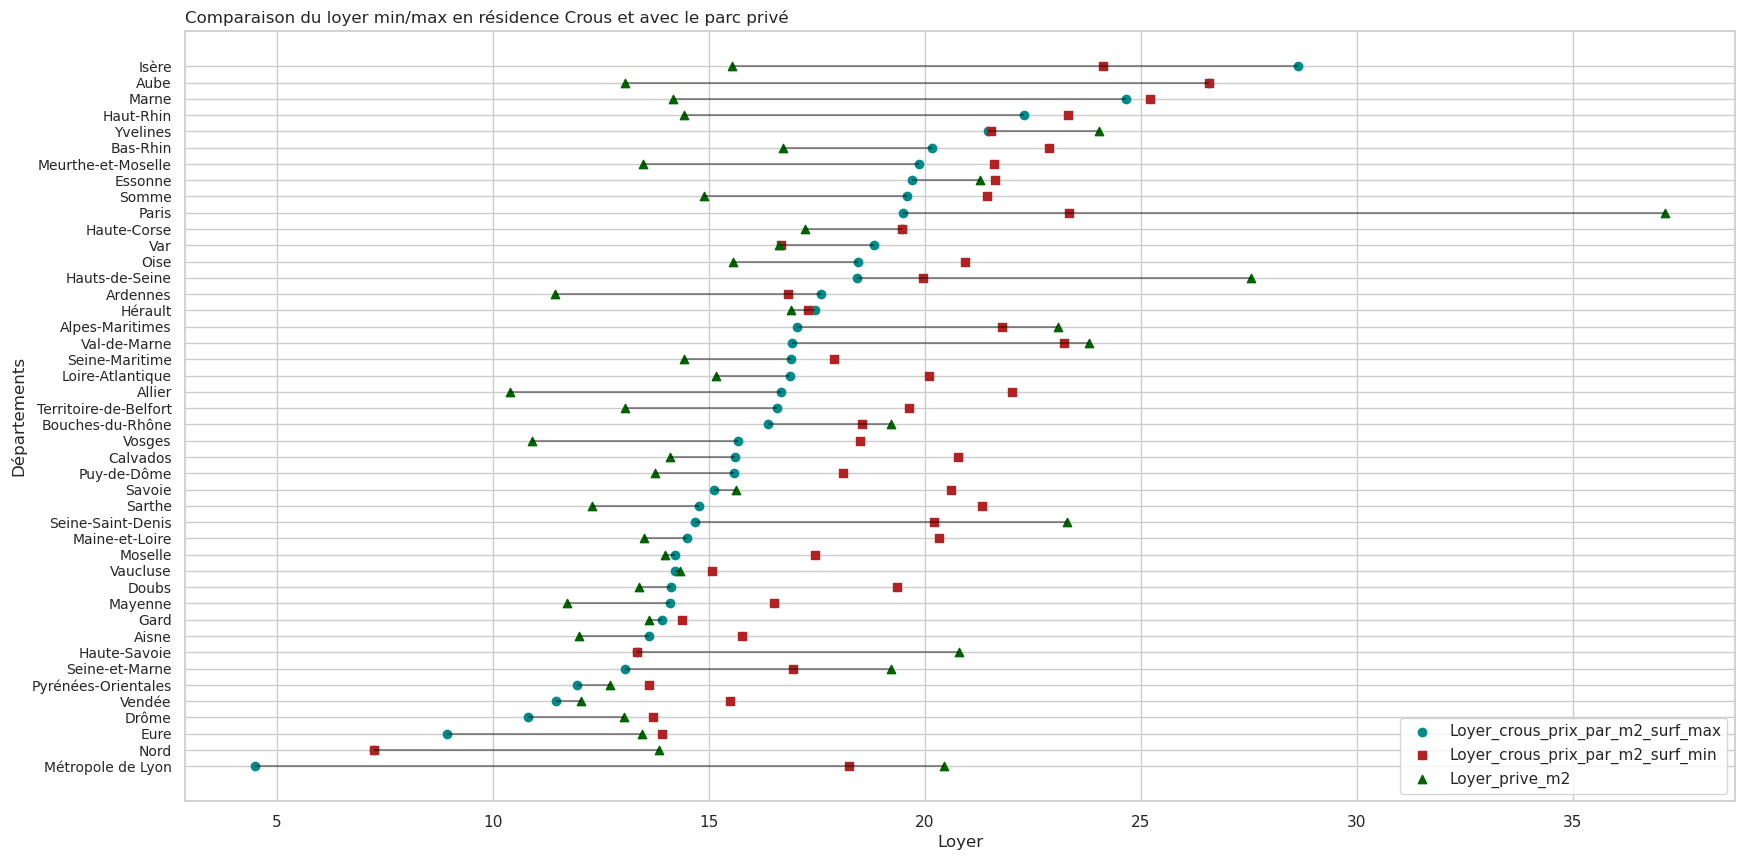

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
# Reorder it following the values of the first value:

ordered_df = df.dropna().groupby("departement").mean().sort_values(by='Loyer_crous_prix_par_m2_surf_max')
my_range=ordered_df.index
 
# The horizontal plot is made using the hline function
plt.hlines(y= my_range, xmin=ordered_df['Loyer_crous_prix_par_m2_surf_max'], xmax=ordered_df['Loyer_prive_m2'], color='black', alpha=0.4)
plt.scatter(ordered_df['Loyer_crous_prix_par_m2_surf_max'], my_range, color='darkcyan', alpha=1, marker = 'o', label='Loyer_crous_prix_par_m2_surf_max')
plt.scatter(ordered_df['Loyer_crous_prix_par_m2_surf_min'], my_range, color='firebrick', alpha=1,  marker = 's', label='Loyer_crous_prix_par_m2_surf_min')
plt.scatter(ordered_df['Loyer_prive_m2'], my_range, color='darkgreen', alpha=1 ,marker = '^', label='Loyer_prive_m2')
plt.legend()

    
# Add title and axis names
plt.yticks(my_range, ordered_df.index, fontsize= 10)
plt.title("Comparaison du loyer min/max en résidence Crous et avec le parc privé", loc='left')
plt.xlabel('Loyer')
plt.ylabel('Départements')
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.style.use("ggplot")


# Show the graph
plt.show()

Nous remarquons dans ce graphique des valeurs qui peuvent sembler aberrantes. En effet, des départements comme l'Aube qui sont des départements où la pression immobilère fait partie des plus faibles (triangle vert), le loyer des résidences Crous est beaucoup plus important que dans des départements comme Paris connu pour avoir des loyers assez conséquents. Cela est dû au faible nombre de données dans ce département. De ce fait, nous avons construit dans la partie II.0, un indicateur du nombre de valeurs manquantes par département. 

Ainsi, nous réalisons le même graphique en enlevant les départements avec un nombre trop important de valeurs manquantes.

/tmp/ipykernel_166/3332087420.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ordered_df = df_dep_ratio .dropna().groupby("departement").mean().sort_values(by='Loyer_crous_prix_par_m2_surf_max')


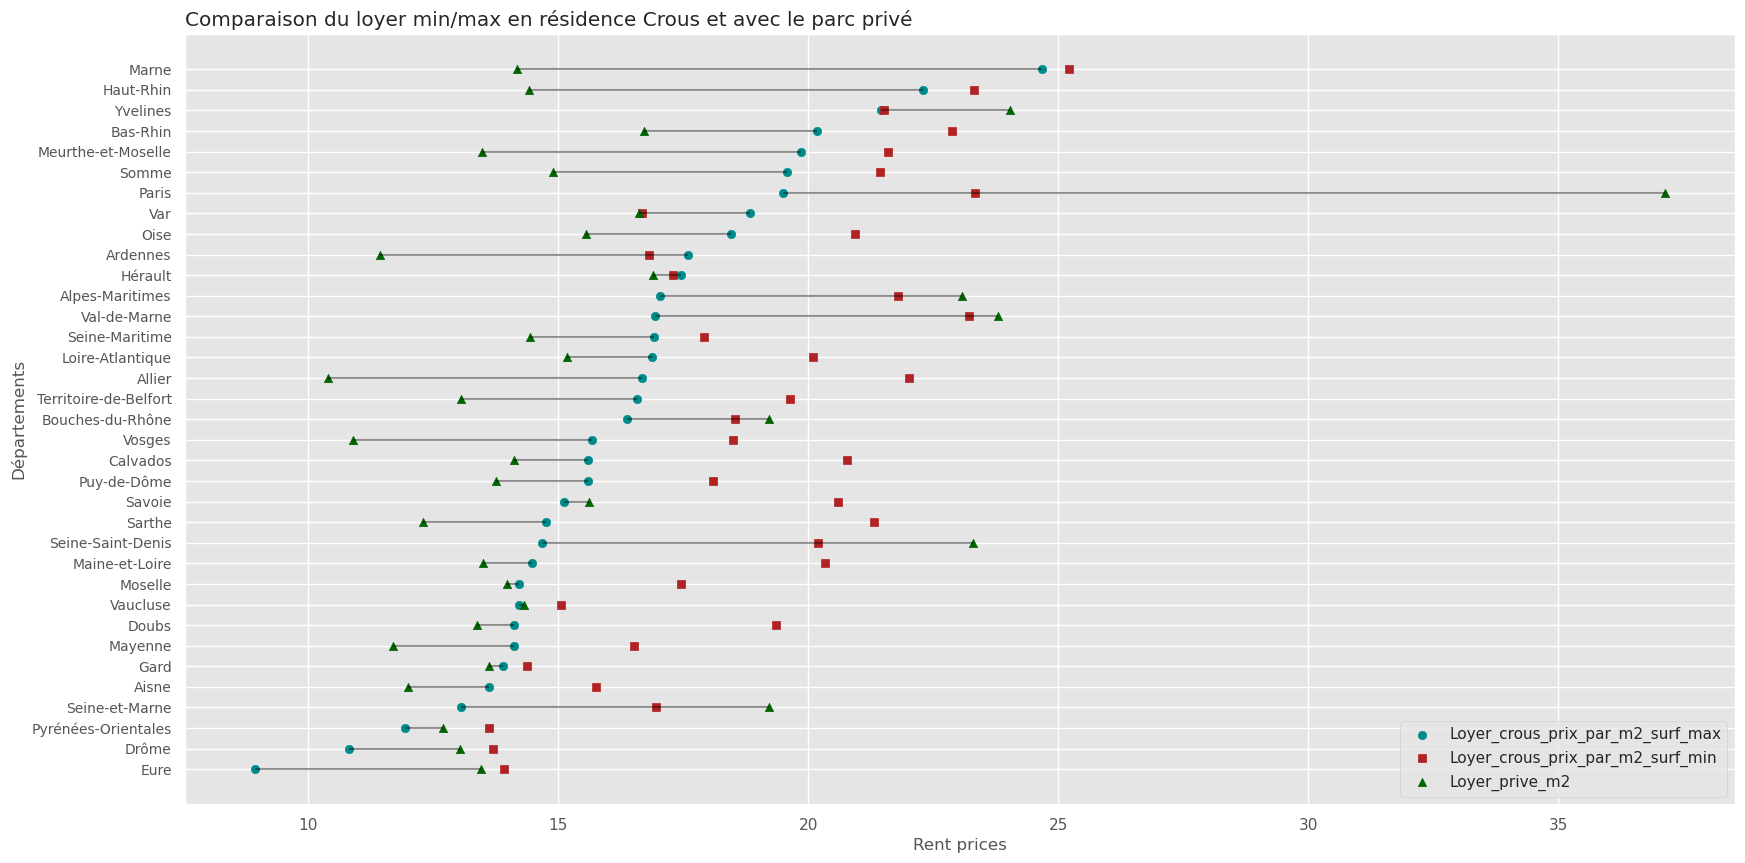

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
# Reorder it following the values of the first value:

ordered_df = df_dep_ratio .dropna().groupby("departement").mean().sort_values(by='Loyer_crous_prix_par_m2_surf_max')
my_range=ordered_df.index
 
# The horizontal plot is made using the hline function
plt.hlines(y= my_range, xmin=ordered_df['Loyer_crous_prix_par_m2_surf_max'], xmax=ordered_df['Loyer_prive_m2'], color='black', alpha=0.4)
plt.scatter(ordered_df['Loyer_crous_prix_par_m2_surf_max'], my_range, color='darkcyan', alpha=1, marker = 'o', label='Loyer_crous_prix_par_m2_surf_max')
plt.scatter(ordered_df['Loyer_crous_prix_par_m2_surf_min'], my_range, color='firebrick', alpha=1,  marker = 's', label='Loyer_crous_prix_par_m2_surf_min')
plt.scatter(ordered_df['Loyer_prive_m2'], my_range, color='darkgreen', alpha=1 ,marker = '^', label='Loyer_prive_m2')
plt.legend()

    
# Add title and axis names
plt.yticks(my_range, ordered_df.index, fontsize= 10)
plt.title("Comparaison du loyer min/max en résidence Crous et avec le parc privé", loc='left')
plt.xlabel('Rent prices')
plt.ylabel('Départements')
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.style.use("ggplot")


# Show the graph
plt.show()

Du graphique ci-dessus nous pouvons dire que : 
+ Le prix au m2 des loyers pour un studio en résidence Crous est quasiment toujours plus élevé que pour un logement de taille supérieur (généralement en colocation). Ce qui est assez cohérent, plus un logement est grand et loué en colocation moins il revient cher individuellement.
+ Les variations du prix du loyer au m2 dans les logements Crous est plus faible que dans le parc privé. 
+ Dans les grandes métropoles étudiantes, le prix au m2 du loyer en Crous est nettement inférieur à celui proposé dans le parc privé : à Paris par exemple, l'écart est d'environ 15 euros par m2. Les loyers du Crous n'augmentent donc pas même si les prix proposé dans le privé est sensiblement plus important. 
+ Dans les zones où la tension étudiante est plus faible, le prix du loyer au m2 dans le privé est souvent plus faible que celui proposé par les résidences Crous : cela s'explique principalement par le fait que dans ces départements, les logements proposés à la location sont souvent de plus grandes superficie (principalement T3), de ce fait ils ne sont pas très représentatifs des logements que rechercheraient un étudiant qui ne souhaite pas forcément être en colocation.

## II.3. Répartition des étudiants et des résidences Crous 

Pour savoir dans quelle mesure les résidences Crous s'adaptent au nombre d'étudiant présent dans chaque département, nous avons comparé les dix départements avec le plus d'étudiants présents avec les dix départements avec le plus de résidences Crous. 

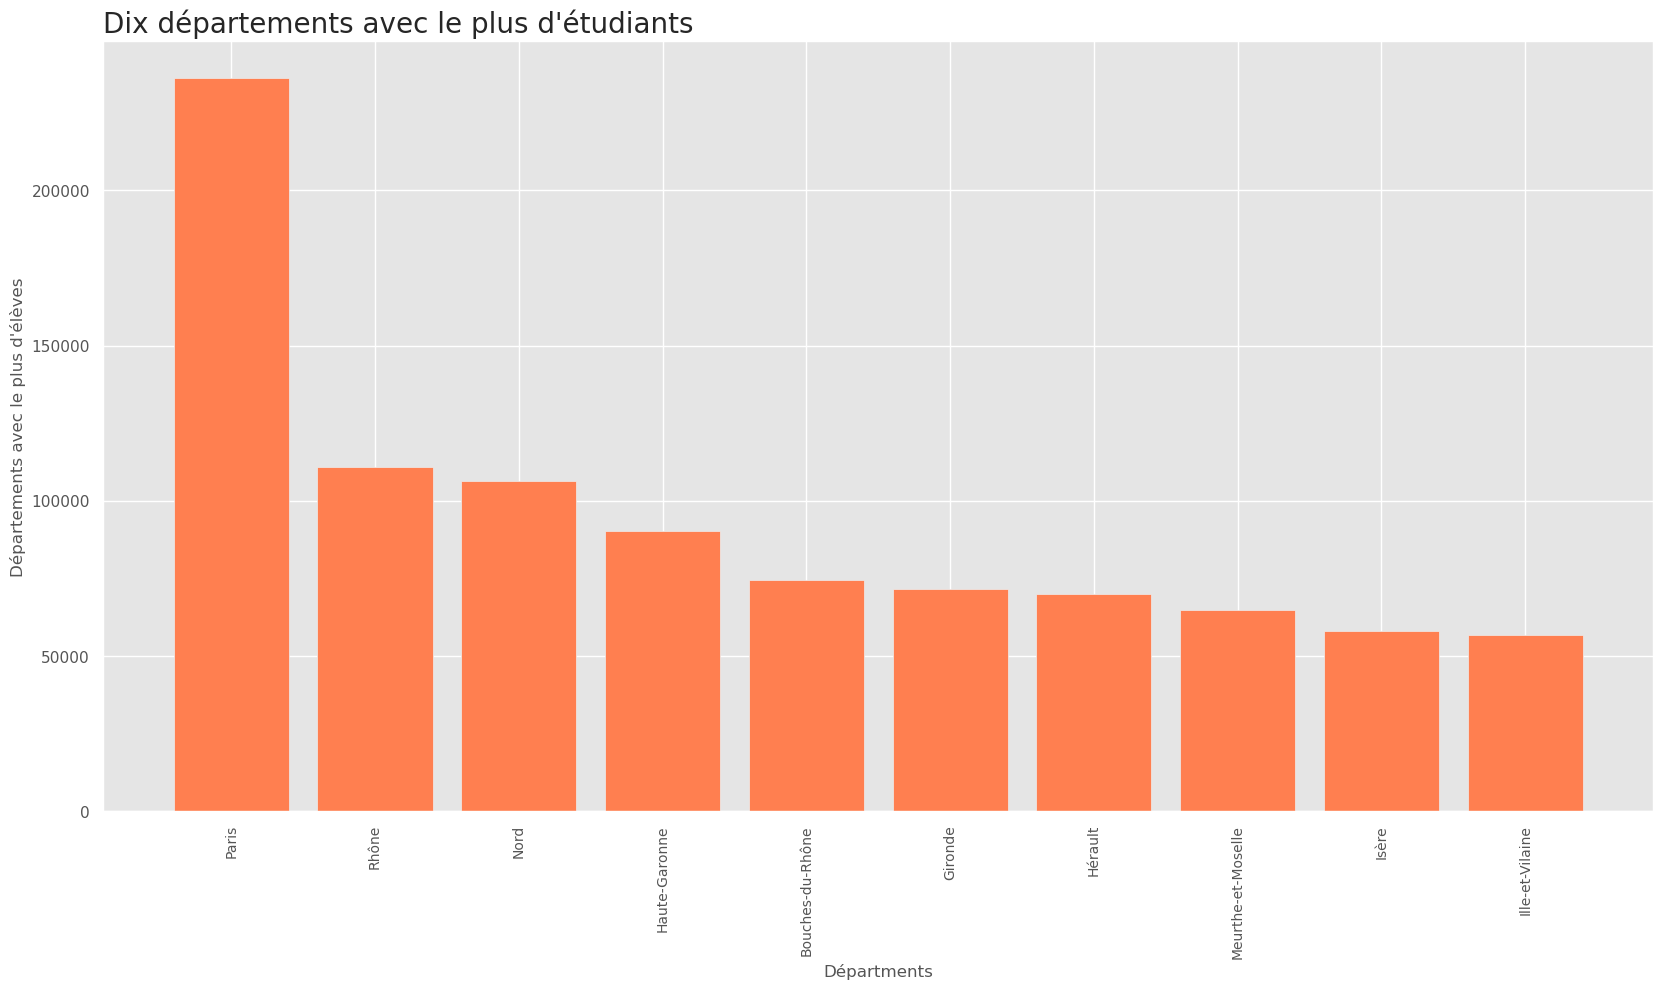

In [36]:
nb_eleve_dep_top_10 = nb_eleve_dep_top_10.loc[(nb_eleve_dep_top_10['effectif_sans_cpge']>56740)] 
departments = nb_eleve_dep_top_10.index
Nb_élèves = nb_eleve_dep_top_10['effectif_sans_cpge']

fig, ax = plt.subplots(figsize=(20, 10)) #taille adéquate 

plt.bar(departments, Nb_élèves, color ='coral' )
plt.xticks(departments, rotation = 'vertical', size =10)
plt.title("Dix départements avec le plus d'étudiants", loc='left', size=20)
plt.xlabel('Départments') 
plt.ylabel("Départements avec le plus d'élèves")
plt.style.use("ggplot") #à utiliser pour améliorer le style 
plt.show()

Parmi les dix dépatements avec le plus de d'étudiants on retrouve 7 départements avec le plus de résidences Crous : il y a bien un effet d'accompagnement de la demande (étudiante) par les résidences Crous. 

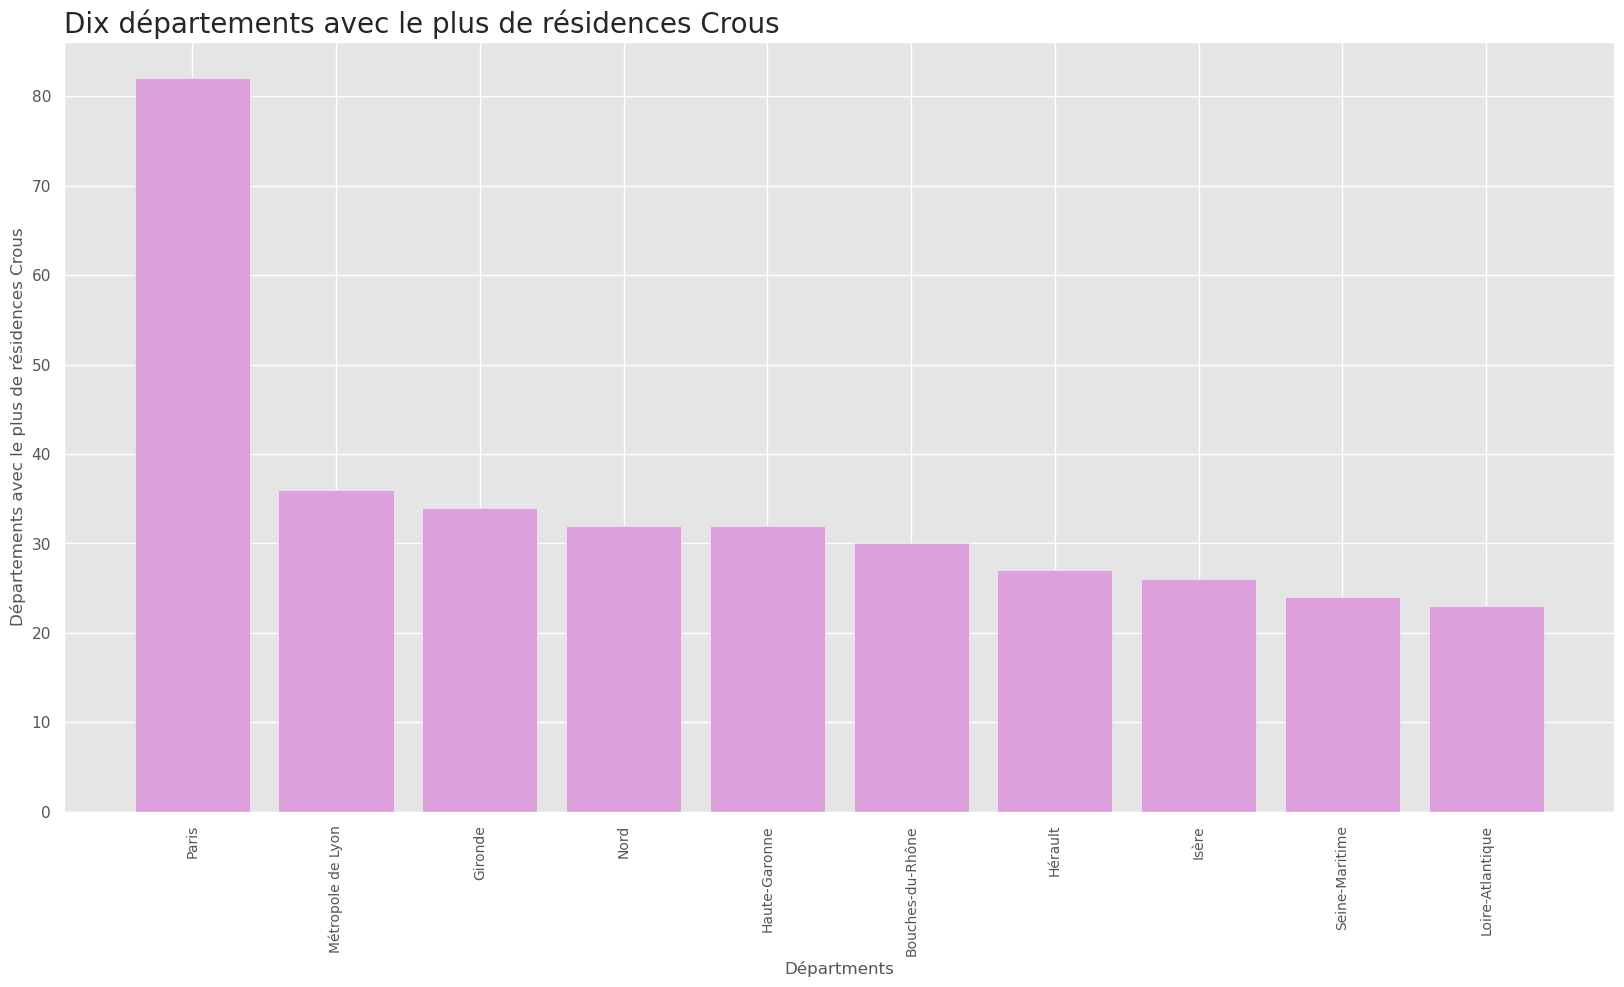

In [37]:


nb_res_dep_top_10 = nb_res_dep_top_10.loc[(nb_res_dep_top_10['index']>=23)] 
departments = nb_res_dep_top_10.index
Nb_res = nb_res_dep_top_10['index']

fig, ax = plt.subplots(figsize=(20, 10)) #taille adéquate 

plt.bar(departments, Nb_res, color ='plum')
plt.xticks(departments, rotation = 'vertical', size =10)
plt.title("Dix départements avec le plus de résidences Crous", loc='left', size=20)
plt.xlabel('Départments') 
plt.ylabel("Départements avec le plus de résidences Crous")
plt.style.use("ggplot")
plt.show()

### II.3.A. Répartition des résidences Crous en fonction du nombre d'étudiants par département

Enfin, nous avons voulu savoir si l'offre et la demande de logements en résidence Crous était homogène sur le plan national. Pour cela, nous avons réalisé une carte chloroplèthe qui permet d'illustrer les différences de pression de la demande étudiante sur les logements Crous entre les départements de France métroplitaine.  
+ **Lecture** : un département jaune signifie qu'il y a ratio assez faible entre le nombre de résidences et le nombre d'étudiants dans le département (entre 0 et 0.02%) et inversement pour les départements foncés. 
+ **Interprétation** : La pression de demande de logements Crous est très marquée en Ile de France, en Bretagne et dans le Bas-Rhin où le pourcentage de résidence par étudiant est inférieur à 0,03 % quand ce ratio passe de 0.10 à 0.23 % dans plusieurs départements du sud de la France. Ainsi, s'il y a plus d'étudiants dans des départements comme Paris, le nombre de résidences sur la population totale des étudiants du département est plus faible que dans d'autres régions. 
+ **Limites** : Ces résultats sont à nuancer car nous ne disposons pas du nombre de places par résidences. En effet, nous ne disposons que d'un proxy, il se pourrait qu'il y ait plus de grandes résidences avec beaucoup de logements en Ile-de-France que dans d'autres régions. 

In [38]:
# Load the json file with departement coordinates
geoData = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")
geoData.index = geoData.index.astype(str).astype(int)
fullData = geoData.merge(nb_residence_par_eleves,left_on=['code'], right_on=['code_insee'])
#Obtain dataframe with data + coordonate (more easy to manipulate) 

On récupère un fond de carte de la France.

In [39]:
France = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")

/opt/mamba/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'Nombre de résidences Crous par étudiants par département')

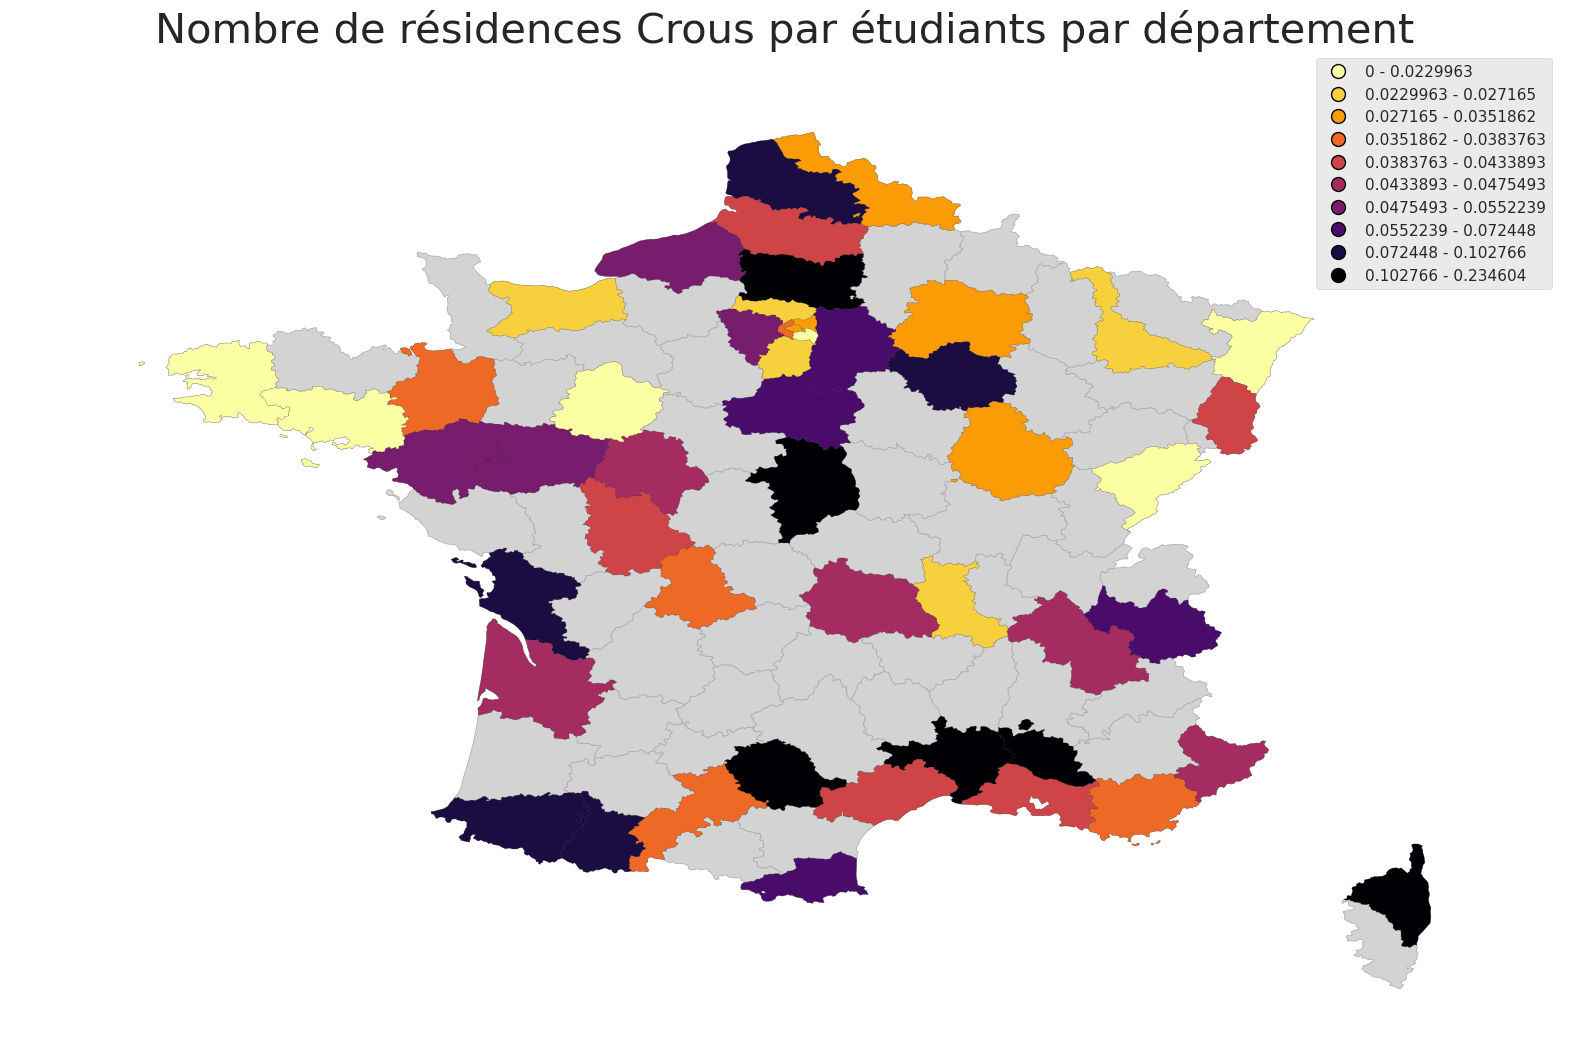

In [40]:
fig, ax = plt.subplots(figsize=(20, 18))
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey') #on affiche toute la France ainsi on n'a pas uniquement les départements ayant des Crous

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(nb_residence_par_eleves['Nb_by_students'], k=10) #on calcule 7 quantiles du nombre d'étudiants par résidences

# Map
maps = gplt.choropleth(fullData[(fullData["level_0"] != "Guyane") & (fullData["level_0"] != "La Réunion") &
                                        (fullData["level_0"] !="Martinique") & (fullData["level_0"] !="Guadeloupe")], 
    hue= "Nb_by_students" , 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
                
);

ax.set_title('Nombre de résidences Crous par étudiants par département', fontsize=30)

# Partie III : Modélisation 
Dans un premier temps nous effectuerons des régressions pour essayer de modéliser la variable Loyer. 

Ensuite, nous nous intéresserons au prix du mètre carré des résidences Crous et essaierons de déterminer si ce-dernier est très sensible aux variations du prix par mètre carré des logements privés loués et de la demande des étudiants. En d'autres termes, nous essaierons de déterminer si le prix au mètre carré à la location des résidences crous suit la loi de marché, la loi de l'offre et de la demande.

## III.0 Préparation du dataframe
On créé un nouveau dataframe df2 qui correspond à df, duquel on retire les valeurs manquantes pour que les régressions fonctionnent.

In [41]:
df2 = df
index_with_nan = df2.index[df2.isnull().any(axis=1)] #on regarde l'index des NaN sur toutes les colonnes du dataframe

df2.drop(index_with_nan,0, inplace=True) #on retire les lignes avec des valeurs manquantes sur le dataframe df2
df2 = df2.reset_index() #On réindexe df2 pour ne pas avoir des 'sauts' dans les indexes.

/tmp/ipykernel_166/1683637193.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2.drop(index_with_nan,0, inplace=True) #on retire les lignes avec des valeurs manquantes sur le dataframe df2


## III.1. Premières régressions linéaires simples pour expliquer la variable Loyer

L'objectif de cette partie est de s'assurer de la cohérence de nos données. Nous effectuons pour cela, la régression du loyer maximal sur la surface maximale.

Dans la partie II.2.A. de statistiques descriptives de df, nous avons vu que les variables Max Loyer et Max Surface prenaient des valeurs respectivement entre 146 et 823 euros et entre 9 et 99 m². Il n'y a donc pas de valeurs incohérentes qui viendraient fausser les résultats.

On trace le nuage de points des loyers en fonction de la surface.

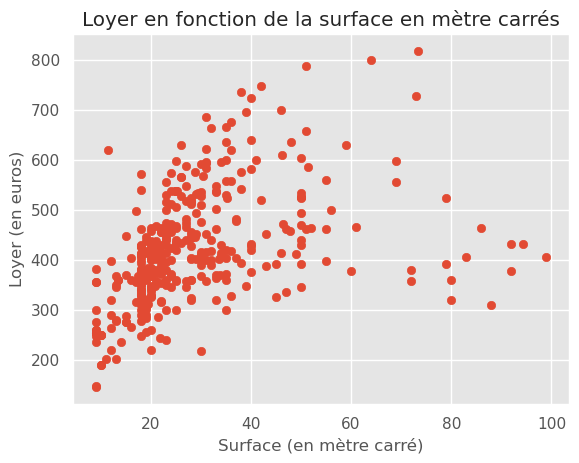

In [42]:
plt.scatter(df2['Max Surface'], df2['Max Loyer'])
plt.title('Loyer en fonction de la surface en mètre carrés')
plt.xlabel('Surface (en mètre carré)')
plt.ylabel('Loyer (en euros)')
plt.show()

In [43]:
from functions_for_modelling_1 import * 
get_OLS_reg(df2['Max Surface'], df2['Max Loyer'])

                            OLS Regression Results                            
Dep. Variable:              Max Loyer   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     81.68
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           8.99e-18
Time:                        18:49:23   Log-Likelihood:                -2256.1
No. Observations:                 373   AIC:                             4516.
Df Residuals:                     371   BIC:                             4524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         334.1737     10.927     30.583      

*__Analyse__*:
- Le R² de 0.18 est plutôt faible, la variable explicative (ici la surface moyenne) n'est pas très utile pour prédire le résultat. 
- La p-value indique que l'on rejette H0 à 1%, le coefficient associé à la variable Max Surface est donc significatif.
- Le nombre d'observations est égal à 373, ce qui est assez faible. 
- La constante est assez élevée, égale à 334, ce qui peut s'expliquer par la nature de la variable expliquée, le loyer, qui prend des valeurs entre 146 et 818 euros.

- En admettant que la régression identifie un effet causal de la surface maximale sur le loyer, une hausse de 1m² de la surface entraînerait une hausse de 3 euros du loyer. Ce qui semble acceptable, partant d'un loyer de 334 euros. 

On trace ensuite la droite de régression linéaire:

<AxesSubplot: xlabel='Max Surface', ylabel='Max Loyer'>

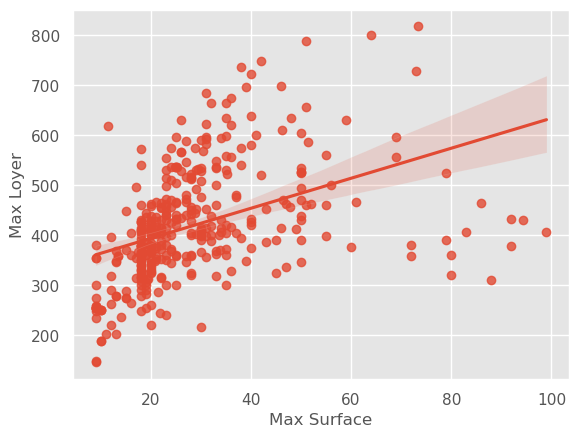

In [44]:
sns.regplot(x='Max Surface', y='Max Loyer', data=df2) 

Sur le graphique ci-dessus, on trace la régression linéaire de Max Loyer sur Max Surface. La bande translucide rouge autour de la droite de régression correspond à l'intervalle de confiance. Pour les surfaces plus élevées, nous disposons de peu de données, la bande est donc plus large.

On s'intéresse désormais à la possible hétéroscedasticité des résidus. 
On effectue le test de Breusch-Pagan afin d'avoir une indication plus précise sur l'homoscédasticité ou non des résidus.

In [45]:
get_bp_test_OLS(df2['Max Surface'],df2['Max Loyer'])

('breusch_pagan_results=',
 {'LM Statistic': 53.8976298520684,
  'LM-Test p-value': 2.1121233733657387e-13,
  'F-Statistic': 62.66334112732375,
  'F-Test p-value': 2.866960276555661e-14})

__Analyse__: 
- Le test de Breusch-Pagan permet de tester l'hypothèse H0: les données sont homoscédastiques versus H1: les données sont hétéroscedastiques.
- Ici, la p-value du test est inférieure à 0.01 donc on rejette H0 à 1%. 

On en conclut que les résidus sont hétéroscedastiques.

On effectue une régression prenant en compte une possible hétéroscedasticité des résidus avec le module RLM (Robust Linear Method) de statsmodel. On utilisera ce type de régression par la suite.

In [46]:
get_RLM(df2['Max Surface'],df2['Max Loyer'])

                    Robust linear Model Regression Results                    
Dep. Variable:              Max Loyer   No. Observations:                  373
Model:                            RLM   Df Residuals:                      371
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 21 Dec 2022                                         
Time:                        18:49:23                                         
No. Iterations:                    15                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         320.2056     10.523     30.429      

__Analyse__:
- On remarque que l'écart type (std err) du coefficient associé à Max Surface a diminué. Il reste significatif puisqu'on rejette H0 à 1% (pvalue < 0.01).
- On remarque également que l'intervalle de confiance est plus restreint.

La régression est donc plus précise avec le module RLM. On privilegiera désormais le module RLM pour effectuer des régressions, puisque celui-ci prend en compte une possible hétéroscedasticité des résidus.

## III.2. Modélisation du prix du mètre carré des résidences Crous

### III. 2.A.  Le prix du mètre carré des appartements privés loués a-t-il une incidence sur le prix du mètre carré des résidences Crous ?

Pour répondre à cette question, nous effectuons la régression linéaire du prix du mètre carré des résidences Crous sur le prix au mètre carré des appartements privés loués.¶

In [47]:
get_RLM(df2['Loyer_prive_m2'],df2['Loyer_crous_prix_par_m2_surf_max'])

                           Robust linear Model Regression Results                           
Dep. Variable:     Loyer_crous_prix_par_m2_surf_max   No. Observations:                  373
Model:                                          RLM   Df Residuals:                      371
Method:                                        IRLS   Df Model:                            1
Norm:                                        HuberT                                         
Scale Est.:                                     mad                                         
Cov Type:                                        H1                                         
Date:                              Wed, 21 Dec 2022                                         
Time:                                      18:49:23                                         
No. Iterations:                                  14                                         
                     coef    std err          z      P>|z|      [0.025

__Analyse__:
- Le coefficient associé au prix du mètre carré des appartements privés loués est positif, il est de 0.1283 et est significatif au seuil de 1% (car la p-value est inférieure à 1%).

- Ainsi, en admettant que la régression identifie un effet causal du prix au mètre carré des logements privés loués, une hausse de 1 euro du prix du mètre carré des appartements privés loués entraîne une hausse de 12 centimes du prix du mètre carré des résidences Crous. 
- Concrètement, si l'on considère un studio de 20m2 loué au sein d'une résidence Crous à Grenoble. Une hausse de 10 euros du prix au mètre carré des loyers de location privée à Grenoble conduit à une hausse de 1,4 euros du prix au mètre carré des loyers des résidences Crous de Grenoble. En particulier, le loyer de l'appartement considéré augmente donc de 28 euros par mois. (En admettant à nouveau que la régression identifie un effet causal du prix au mètre carré des loyers privés).

- La constante est de 14,3 ce qui paraît cohérent en réfléchissant en termes de prix au mètre carré. 

Les résidences Crous tendent donc à suivre les variations des prix de marché, mais très faiblement (de l'ordre de 12 centimes). Pour affirmer que les résidences Crous suivent pleinement la loi du marché, il faudrait qu'une augmentation de 1€/m2 dans le parc privé implique une augmentation de 1€/m2 de leurs loyers. Ces légères augmentations sont sûrement dues à des coûts d'entretiens des bâtiments plus élevés dans ces villes. Ainsi, les résidences Crous ne font pas de la "spéculation" sur les loyers. 

<AxesSubplot: xlabel='Loyer_prive_m2', ylabel='Loyer_crous_prix_par_m2_surf_max'>

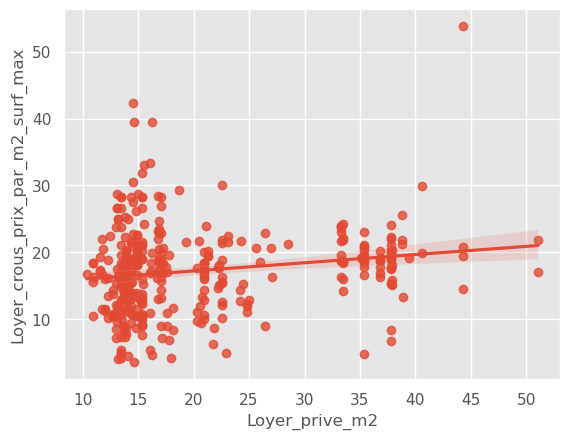

In [48]:
sns.regplot(x='Loyer_prive_m2', y='Loyer_crous_prix_par_m2_surf_max', data=df2) 

### III. 2.B.  Le nombre d'étudiants scolarisés à proximité des résidences Crous ont-ils une incidence sur le prix au mètre carré de ces dernières ? 

Nous effectuons la régression du prix au mètre carré des logements Crous sur le nombre d'étudiants scolarisés à proximité.

In [49]:
df2['Nbstudents'].describe()

count       373.000000
mean      92742.745308
std      111873.041768
min           0.000000
25%       10029.000000
50%       36442.000000
75%       74156.000000
max      323129.000000
Name: Nbstudents, dtype: float64

La variable Nbstudents correspond au nombre d'étudiants scolarisés à proximité de résidences Crous.
On constate que le minimum de cette variable est de 0 ce qui signifie que certaines valeurs sont à 0 et vont fausser la régression.

On créée donc un nouveau dataframe duquel on retire ces valeurs nulles. Le nouveau dataframe, df_students, ne contient donc plus les résidences Crous associées à aucun étudiant. 

In [50]:
i = df2[df2['Nbstudents']<=0].index.values
df_students = df2.drop(i,axis=0)

In [51]:
print(df_students['Nbstudents'].describe()) 
get_RLM(df_students['Nbstudents'],df_students['Loyer_crous_prix_par_m2_surf_max'])

count       321.000000
mean     107766.492212
std      113689.237656
min        1682.000000
25%       26664.000000
50%       44394.000000
75%      269138.000000
max      323129.000000
Name: Nbstudents, dtype: float64
                           Robust linear Model Regression Results                           
Dep. Variable:     Loyer_crous_prix_par_m2_surf_max   No. Observations:                  321
Model:                                          RLM   Df Residuals:                      319
Method:                                        IRLS   Df Model:                            1
Norm:                                        HuberT                                         
Scale Est.:                                     mad                                         
Cov Type:                                        H1                                         
Date:                              Wed, 21 Dec 2022                                         
Time:                                  

__Analyse__:
- Le coefficient associé à la variable nombre d'étudiants est positif : il y a donc une association positive entre le nombre d'étudiants et le prix au mètre carré
- Le coefficient est significatif au seuil de 1% car la p-value = 0.004 <0.01.
- Le coefficient est très faible, proche de 0. Cependant, rapporté au nombre moyen d'étudiants qui est de l'ordre de la dizaine voire de la centaine de millier, il ne semble pas incohérent. Il faut que l'augmentation du nombre d'étudiants soit d'un facteur 10^6 pour avoir un impact significatif. 
- Ainsi, en admettant que la régression identifie un effet causal du nombre d'étudiants, une hausse de 1000 élèves a un impact de 0.7 centimes sur le prix du mètre carré. Donc, une hausse de 100 000 élèves a un impact de près de 80 centimes sur le prix du mètre carré.

+ Interprétation : Ces résultats sont rassurants. Ils signifient que les résidences Crous ne spéculent pas sur la hausse de la demande et du nombre d'étudiants dans la région où ils se trouvent.

<AxesSubplot: xlabel='Nbstudents', ylabel='Loyer_crous_prix_par_m2_surf_max'>

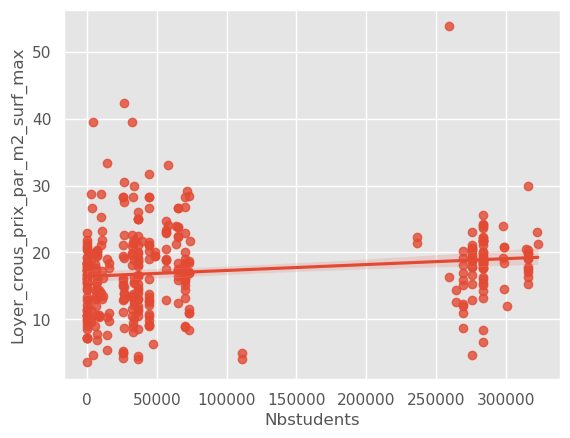

In [52]:
sns.regplot(x='Nbstudents', y='Loyer_crous_prix_par_m2_surf_max', data=df2) 

On remarque que l'on n'a très peu de valeurs entre 7 000 et 250 000. Ceci est dû au fait qu'un même étudiant est associé à plusieurs résidences. En effet, on a associé à chaque résidences tous les étudiants scolarisés dans un rayon de 20km (partie I.5). Une autre explication serait qu'il y a une grande disparité dans la répartition des étudiants dans les villes en France, comme le montre les graphiques de la partie II où il y a un grand écart entre Paris et le Rhône par exemple. Ceci cause ces deux problèmes:
- Premièrement, un "saut" dans les valeurs de 7 000 à 250 000 c'est-à-dire que presque aucune résidence ne comptabilise un nombre d'étudiants entre 7 500 et 250 000 dans son rayon de 20km. On peut lisser ces donner en appliquant le logarithme à la variable, ce que l'on fera en III.2.D.

- Deuxièmement, il y a sans doute un effet de corrélation de "cluster" qui impacte la régression, car un même étudiant est associé à plusieurs résidences Crous et donc à plusieurs prix par mètre carré de résidences Crous. Nous ne résoudrons pas cet inconvénient. 

### III. 2.C.  Y-a-t-il un effet commun du nombre d'étudiants scolarisés à proximité des résidences et du prix au mètre carré des loyers privés sur le prix au mètre carré des résidences Crous ? 

On effectue à présent une régression longue du prix au mètre carré dans les résidences Crous sur le nombre d'étudiants et le prix au mètre carré des appartements privés loués.

In [53]:
get_RLM(df_students[['Nbstudents','Loyer_prive_m2']],df_students['Loyer_crous_prix_par_m2_surf_max'])

                           Robust linear Model Regression Results                           
Dep. Variable:     Loyer_crous_prix_par_m2_surf_max   No. Observations:                  321
Model:                                          RLM   Df Residuals:                      318
Method:                                        IRLS   Df Model:                            2
Norm:                                        HuberT                                         
Scale Est.:                                     mad                                         
Cov Type:                                        H1                                         
Date:                              Wed, 21 Dec 2022                                         
Time:                                      18:49:24                                         
No. Iterations:                                  16                                         
                     coef    std err          z      P>|z|      [0.025

__Analyse__:
- Le coefficient associé à la variable Loyer_prive_m2 est significatif au seuil de 10% (p-value = 0.067 <10%) et positif. Ainsi, comme pour la régression simple (III.3.A), une hausse du prix au mètre carré des loyers des appartements privés loués d'une ville est associée à une hausse des loyers des résidences du Crous de cette même ville. Une augmentation de 1 euro du loyer privé conduit à une augmentation de 14 centimes du loyer crous, en supposant que la regression identifie un effet causal du prix au mètre carré des appatemenrs privés. 

- Il est étonnant que le coefficient associé au nombre d'étudiants soit négatif. Une baisse du nombre d'étudiants entraînerait une hausse du prix au mètre carré des résidences crous, ce qui ne coïncide pas avec la régression précédente (III.3.B) et avec les analyses obtenues dans la partie visualisation. *Les loyers des résidences Crous de Paris sont 100 euros plus chers que ceux des résidences de Dijon, ville qui compte moins d'étudiants que Paris.* Cependant, ce coefficient n'est pas significatif puisque sa p-value >60%.  

On arrive à la même conclusion que précédemment (III.3.A), les Crous suivent la loi du marché mais très faiblement. 

### III.2.D. L'élasticité prix du mètre carré des résidences Crous 

On s'intérèsse enfin à l'élasticité prix du mètre carré des résidences Crous sur le nombre d'étudiant. 

Nous effectuons la régression linéaire simple du logarithme du prix par mètre carré dans les résidences Crous sur le logarithme du nombre d'étudiants pour obtenir l'élasticité prix du mètre carré des résidences Crous. Le fait d'appliquer le logarithme aux deux variables nous permet d'une part d'obtenir l'élasticité et d'autre part, de lisser les données (par rapport au III.2.B).

In [54]:
x= np.log(df_students['Nbstudents'])
y= np.log(df_students['Loyer_crous_prix_par_m2_surf_max'])
get_RLM(x,y)

                           Robust linear Model Regression Results                           
Dep. Variable:     Loyer_crous_prix_par_m2_surf_max   No. Observations:                  321
Model:                                          RLM   Df Residuals:                      319
Method:                                        IRLS   Df Model:                            1
Norm:                                        HuberT                                         
Scale Est.:                                     mad                                         
Cov Type:                                        H1                                         
Date:                              Wed, 21 Dec 2022                                         
Time:                                      18:49:24                                         
No. Iterations:                                  15                                         
                 coef    std err          z      P>|z|      [0.025    

_Analyse_:
- Le coefficient associé au logarithme du nombre total d'étudiants est positif et significatif au seuil de 1%.

- En supposant que la régression identifie un effet causal du nombre d'étudiants, une hausse de 100 points de pourcentage du nombre d'étudiants entraîne une hausse de 4 points de pourcentage du logarithme du prix au mètre carré des résidences Crous, toutes choses égales par ailleurs. 

- Le coefficient correspond à une élasticité, il mesure la sensibilité du prix à une variation du nombre d'étudiants. Le nombre d'étudiants peut ici être considéré comme la demande, puisque les étudiants constituent l'essentiel des locataires des résidences Crous. L'elasticité est donc très proche de 0. Le prix est presque inélastique à la demande: une variation de la demande affecte donc faiblement le prix.

On en conclut que le Crous ne suit que très faiblement la loi de la demande. Ceci confirme le résultat obtenu en III.2.B.

In [55]:
df2['log_Nbstudents'] = np.log(df_students['Nbstudents'])
df2['log_Loyer_crous_prix_par_m2_surf_max'] = np.log(df_students['Loyer_crous_prix_par_m2_surf_max'])

<AxesSubplot: xlabel='log_Nbstudents', ylabel='Loyer_crous_prix_par_m2_surf_max'>

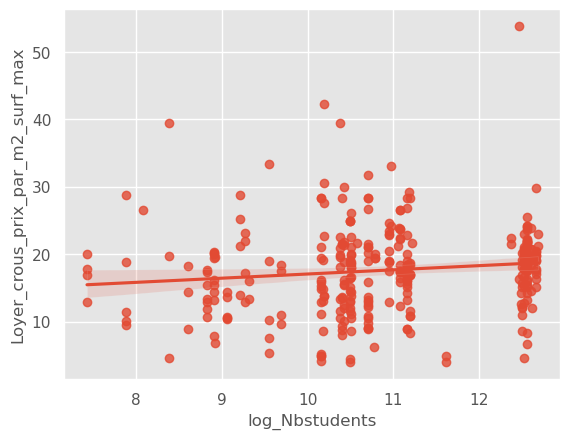

In [56]:
sns.regplot(x='log_Nbstudents', y='Loyer_crous_prix_par_m2_surf_max', data=df2) 

On remarque que les données sont bien plus réparties que sur le graphe III.2.B en raison de l'application du logarithme aux deux variables.

# Conclusion 

## Bilan 

L’objectif  de ce projet était de déterminer si les loyers des résidences Crous suivaient la loi de l’offre et de la demande. 
Pour ce faire, nous avons collecté une base de données regroupant l’ensemble des résidences Crous présentes sur le territoire français, sur laquelle nous avons cherché à extraire les données pertinentes à notre problématique à savoir : le loyer et les surfaces des logements proposés par le Crous. Nous avons dû pour cela utiliser des méthodes d’extraction textuelle comme le NLP et en particulier une méthode de tokenisation. 
Dans un deuxième temps, pour avoir une première vision globale des données et avoir des premiers éléments de réponse à notre problématique. Nous avons réalisé plusieurs représentations graphiques à différentes échelles et en utilisant différents types de graphiques pour rendre l'interprétation plus pertinente et plus parlante visuellement. De ceux-ci, nous avons pu constater que le prix des loyers dans les résidences Crous n’évoluait que faiblement selon la loi de l’offre et de la demande. 
Ainsi, nous avons voulu confirmer dans une dernière partie, cette intuition par un modèle de régression linéaire. De ce fait, nous pouvons conclure que les loyers des Crous ne suivent pas vraiment la loi de l’offre et de la demande notamment en ce qui concerne la demande puisqu’ils n’augmentent pas avec le nombre d’étudiants. Elles restent également assez insensibles aux prix du parc privé. Cela montre, comme on pouvait l’imaginer, que ces résidences ne spéculent pas avec le nombre d’étudiants ou avec le prix des loyers de la ville. 

## Difficultés

 L’une des difficultés majeure rencontrée au début du projet a été d’extraire pour chaque résidence toutes les surfaces des logements proposés et de leur associer le loyer correspondant. En effet, notre base de données présentait près de 800 lignes de résidences et les résidences avaient renseigné différemment leur informations, il fallait donc trouver un moyen uniforme d’extraire l’information qui pouvait s’adapter à ces différences de codage. Une autre difficulté a été de réaliser à partir de notre base de données sur les résidences Crous, d’associer dans un rayon de 20Km l’effectif des établissements supérieurs situés dans un rayon de 20 km autour de chaque résidence.

## Limites

Nos résultats doivent être nuancés par différents éléments. En effet, la complexité de la base de données fait que nous n’avons pas pu obtenir l’ensemble des caractéristiques voulues. Ainsi, nous n’avons pas pu associer les loyers aux surfaces correspondantes, ni obtenir le nombre de places par résidence. Nous sommes donc obligés par la suite d’utiliser les valeurs maximales ou minimales de ces variables pour avoir des résultats cohérents. Cela a pu en partie fausser nos résultats.  
D’autre part, nous avons manqué de variables pour modéliser le prix au mètre carré des loyers des Crous et faire des régressions. Nous avons ainsi sûrement omis certains déterminants des loyers. 